# SENTIMENT ANALYSIS 
### BASED ON TWEET TEXT ANALYSIS 


### DATASET DESCRIPTION

In order to train our model, which we can apply to the tweets we will gather. and in order for a model to have decent performance, we need a relatively good size of dataset to train. The dataset for training, We chose is “Sentiment140”, which originated from Stanford University. More info on the dataset can be found from the link. http://help.sentiment140.com/for-students/

### Pre Processing the DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

By looking at the description of the dataset from the link, the information on each field can be found.

0 — the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

1 — the id of the tweet (2087)

2 — the date of the tweet (Sat May 16 23:58:44 UTC 2009)

3 — the query (lyx). If there is no query, then this value is NO_QUERY.

4 — the user that tweeted (robotickilldozr)

5 — the text of the tweet (Lyx is cool)

In [2]:
cols=["sentiment","id","date","query","user","text"]
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",header=None, names=cols)

In [3]:
df.sentiment.value_counts()


4    800000
0    800000
Name: sentiment, dtype: int64

Dataset has 1.6million entries, with no null entries, and importantly for the “sentiment” column, even though the dataset description mentioned neutral class, the training set has no neutral class.
50% of the data is with negative label, and another 50% with positive label.
We can see there’s no skewness on the class division.



In [4]:
#dropping columns that we don't need for our purpose
df.drop(["id","date","query","user"],axis=1,inplace=True)

We first started by dropping the columns that we don’t need for the specific purpose of sentiment analysis.
we decided to drop above four columns.

### Data Preparation
As a way of sanity check, let’s look at the length of the string in text column in each entry.



In [5]:
#calculating the length of each tweet in text column
df["pre_clean_len"] = [len(t) for t in df.text]

#### Data Dictionary — first draft
Below is the first draft of the data dictionary for the dataset, but as we go through preparation, this will need to be updated.


In [6]:
#Data dictionnary

data_dict={
    "sentiment":{
        'type': df.sentiment.dtype,
        'description': "sentiment class : 0:negative , 1:positive "
    },
    "text":
    {
        'type': df.text.dtype,
        'description': "tweets"
    },
    "pre_clean_len":
    {
        'type': df.pre_clean_len.dtype,
        'description': "tweets length before cleaning"
    },
    'dataset_shape':df.shape
    
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'tweets length before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class : 0:negative , 1:positive ',
               'type': dtype('int64')},
 'text': {'description': 'tweets', 'type': dtype('O')}}


We will also plot pre_clean_len with box plot, so that we can see the overall distribution of length of strings in each entry.

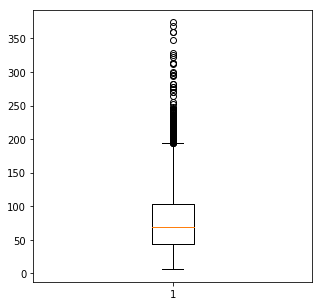

In [7]:
#boxplot visualization of tweets string length
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

### Defining data cleaning steps

Data Preparation 1: HTML decoding

Data Preparation 2: ‘@’mention

Data Preparation 3: URL links

Data Preparation 4: UTF-8 BOM (Byte Order Mark)

Data Preparation 5: hashtag / numbers



In [8]:
tok = WordPunctTokenizer()
#regex for @mention detection
mention_regex = r'@[A-Za-z0-9_]+'
#regex for links detection
http_regex = r'https?://[^ ]+'
www_regex = r'www./[A-Za-z0-9-]+./[A-Za-z][ ]'
bom_removing = "ï¿½"
combined_regex = r'|'.join((mention_regex, http_regex))
#negation dictionnary
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

### Defining data cleaning function

With above five data cleaning task, I will first define data cleaning function, and then will be applied to the whole dataset. Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorizer.

In [9]:
#main function for cleaning the tweets
def tweet_cleaner(text):
    soup = BeautifulSoup(text,"lxml")
    souped = soup.get_text()
    
    try:
        bom_removed = souped.replace(bom_removing, "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_regex, '', bom_removed)
    stripped = re.sub(www_regex, '', stripped)
    
    lower_case = stripped.lower()
    
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    
    return (" ".join(words)).strip()

In [10]:
nums = [0,400000,800000,1200000,1600000]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
#i cleaned the wole dataset
for i in range(nums[0],nums[4]):
    if( (i+1)%10000 == 0 ) :
        print ("Tweets %d of %d has been processed" % ( i+1, nums[4] ) )                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))
print("Done")

Cleaning and parsing the tweets...

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweet

In [11]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()
my_df = clean_df

In [12]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1600000 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


### Saving cleaned data as csv


It looks like there are some null entries in the data, let’s investigate further.



In [13]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target


In [14]:
np.sum(my_df.isnull().any(axis=1))

0

In [15]:
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head(5)


,sentiment,text,pre_clean_len


In [16]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1600000 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [17]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1600000 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [18]:
my_df.tail()

,text,target
1599995,just woke up having no school is the best feel...,4
1599996,thewdb com very cool to hear old walt interviews,4
1599997,are you ready for your mojo makeover ask me fo...,4
1599998,happy th birthday to my boo of alll time tupac...,4
1599999,happy charitytuesday,4


Exporting the cleaned dataset to CSV

In [21]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0
